# Perceptron

- neuronová síť s jediným neuronem
- klasifikuje váženým součtem rysů (váha může být kladná i záporná)

$$ f(x) = \begin{cases}1 & \text{pro }\mathbf w \cdot \mathbf x + b > 0\\0 & \text{jindy}\end{cases} $$

- učící algoritmus iteruje přes data, když by současné váhy vedly k chybě, provede update:

$$ \mathbf w_{t+1} := \mathbf w_{t} + (\hat y - y) \mathbf x $$

- učí se iterativně - je potřeba včas zastavit

In [8]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import joblib

X_train, y_train, X_test, y_test = \
    joblib.load("data/newsgroup/newsgroup-bin.pickle")
X_train = X_train.tocsr()

In [10]:
from sklearn.linear_model import Perceptron, SGDClassifier

#perceptron = Perceptron(n_iter=10).fit(X_train, y_train)
perceptron = SGDClassifier(loss='log', n_iter=150).fit(X_train, y_train)

train_acc = np.mean(perceptron.predict(X_train) == y_train)
test_acc = np.mean(perceptron.predict(X_test) == y_test)

print("training accuracy: {}".format(train_acc))
print("test accuracy:     {}".format(test_acc))

training accuracy: 0.9714
test accuracy:     0.8022813688212928


## Učící křivka

- problém přeučení

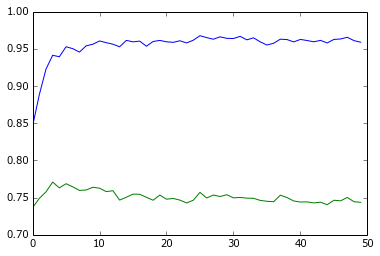

In [4]:
train_accuracies = []
test_accuracies = []

perceptron = Perceptron(n_iter=1, warm_start=True)
for i in range(50):
    perceptron.fit(X_train, y_train)
    train_accuracies.append(np.mean(perceptron.predict(X_train) == y_train))
    test_accuracies.append(np.mean(perceptron.predict(X_test) == y_test))
    
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
plt.plot(train_accuracies)
plt.plot(test_accuracies)

## Porovnání s Naivním Bayesovským klasifikátorem

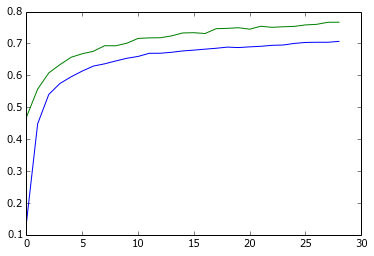

In [6]:
from sklearn.naive_bayes import BernoulliNB
import gc

bayes_accuracies = []
perceptron_accuracies = []
for c in range(500, 15000, 500):
    X_c = X_train[:c]
    y_c = y_train[:c]
    bayes = BernoulliNB().fit(X_c, y_c)
    perceptron = Perceptron(n_iter=10).fit(X_c, y_c)
    bayes_accuracies.append(np.mean(bayes.predict(X_test) == y_test))
    perceptron_accuracies.append(np.mean(perceptron.predict(X_test) == y_test))
    gc.collect()

ax = plt.gca()
ax.ticklabel_format(useOffset=False)
plt.plot(bayes_accuracies)  
plt.plot(perceptron_accuracies)

## Efekt počtu rysů na učení

In [13]:
import gc

X_train_col = X_train.tocsc()
X_test_col = X_test.tocsc()
for i in range(1000, 4001, 1000):
    X_t = X_train_col[:,:i]
    perceptron = Perceptron(n_iter=10).fit(X_t, y_train)
    acc = np.mean(perceptron.predict(X_test[:,:i]) == y_test)
    print("{} words => {}".format(i, acc))
    gc.collect()

0.630578347008
0.690614368621
0.713628176906


##  Četnost místo binárních příznaků

In [11]:
import joblib
import numpy as np

X_train, y_train, X_test, y_test = \
    joblib.load("data/newsgroup/newsgroup.pickle")
    
perceptron = Perceptron(n_iter=10).fit(X_train, y_train)

train_acc = np.mean(perceptron.predict(X_train) == y_train)
test_acc = np.mean(perceptron.predict(X_test) == y_test)

print("training accuracy: {}".format(train_acc))
print("test accuracy:     {}".format(test_acc))

training accuracy: 0.8883333333333333
test accuracy:     0.7336401841104663
